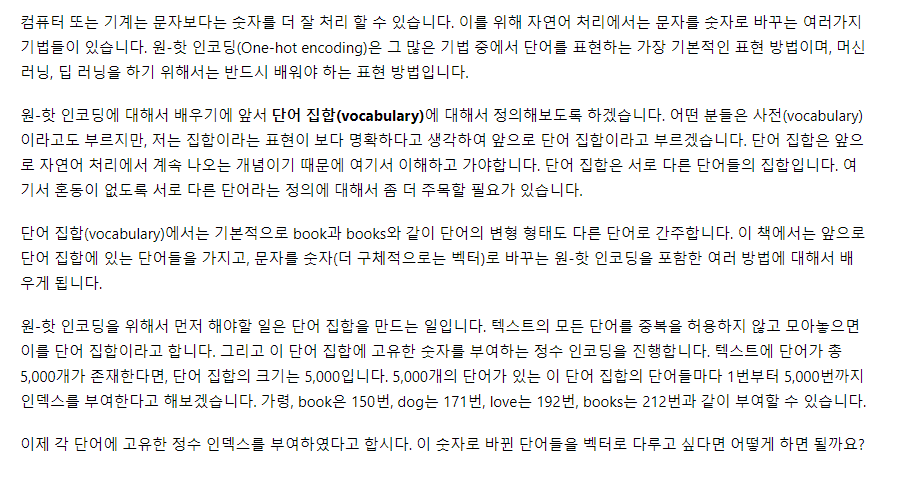

### 1. 원-핫 인코딩(One-hot encoding)이란?
원-핫 인코딩은 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식입니다. 이렇게 표현된 벡터를 원-핫 벡터(One-hot vector)라고 합니다.

원-핫 인코딩을 두 가지 과정으로 정리해보겠습니다.
- 1) 각 단어에 고유한 인덱스를 부여합니다. (정수 인코딩)
- 2) 표현하고 싶은 단어의 인덱스의 위치에 1을 부여하고, 다른 단어의 인덱스의 위치에는 0을 부여합니다.

이해를 돕기 위해서 한국어 문장을 예제로 원-핫 벡터를 만들어보겠습니다.
우선, 한국어 자연어 처리를 위해 코엔엘파이 패키지를 설치합니다.

In [1]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 23.9 MB/s eta 0:00:00


문장 : 나는 자연어 처리를 배운다

위 문장에 대해서 원-핫 인코딩을 진행하는 코드는 아래와 같습니다.

In [2]:
from konlpy.tag import Okt  
okt = Okt()  
token = okt.morphs("나는 자연어 처리를 배운다")  
print(token)
# 코엔엘파이의 Okt 형태소 분석기를 통해서 우선 문장에 대해서 토큰화를 수행하였습니다.

['나', '는', '자연어', '처리', '를', '배운다']


In [3]:
word2index = {}
for voca in token:
     if voca not in word2index.keys():
       word2index[voca] = len(word2index)
print(word2index)

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


각 토큰에 대해서 고유한 인덱스(index)를 부여하였습니다. 지금은 문장이 짧기 때문에 각 단어의 빈도수를 고려하지 않지만, 빈도수 순대로 단어를 정렬하여 고유한 인덱스를 부여하는 작업이 사용되기도 합니다. (정수 인코딩 챕터 참고)

In [4]:
# 토큰을 입력하면 해당 토큰에 대한 원-핫 벡터를 만들어내는 함수를 만들었습니다.
def one_hot_encoding(word, word2index):
       one_hot_vector = [0]*(len(word2index))
       index = word2index[word]
       one_hot_vector[index] = 1
       return one_hot_vector

In [5]:
one_hot_encoding("자연어",word2index)

[0, 0, 1, 0, 0, 0]

해당 함수에 '자연어'라는 토큰을 입력으로 넣어봤더니 [0, 0, 1, 0, 0, 0]라는 벡터가 나왔습니다. 자연어는 단어 집합에서 인덱스가 2이므로, 자연어를 표현하는 원-핫 벡터는 인덱스 2의 값이 1이며, 나머지 값은 0인 벡터가 나옵니다.

### 2. 원-핫 인코딩(One-hot encoding)의 한계
이러한 표현 방식은 단어의 개수가 늘어날 수록, 벡터를 저장하기 위해 필요한 공간이 계속 늘어난다는 단점이 있습니다. 다른 말로는 벡터의 차원이 계속 늘어난다고도 표현합니다. 원 핫 벡터는 단어 집합의 크기가 곧 벡터의 차원 수가 됩니다. 가령, 단어가 1,000개인 코퍼스를 가지고 원 핫 벡터를 만들면, 모든 단어 각각은 모두 1,000개의 차원을 가진 벡터가 됩니다. 다시 말해 모든 단어 각각은 하나의 값만 1을 가지고, 999개의 값은 0의 값을 가지는 벡터가 되는데 이는 저장 공간 측면에서는 매우 비효율적인 표현 방법입니다.

또한 원-핫 벡터는 단어의 유사도를 표현하지 못한다는 단점이 있습니다. 예를 들어서 늑대, 호랑이, 강아지, 고양이라는 4개의 단어에 대해서 원-핫 인코딩을 해서 각각, [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]이라는 원-핫 벡터를 부여받았다고 합시다. 이 때 원-핫 벡터로는 강아지와 늑대가 유사하고, 호랑이와 고양이가 유사하다는 것을 표현할 수가 없습니다. 좀 더 극단적으로는 강아지, 개, 냉장고라는 단어가 있을 때 강아지라는 단어가 개와 냉장고라는 단어 중 어떤 단어와 더 유사한지도 알 수 없습니다.

단어 간 유사성을 알 수 없다는 단점은 검색 시스템 등에서 심각한 문제입니다. 가령, 여행을 가려고 웹 검색창에 '삿포로 숙소'라는 단어를 검색한다고 합시다. 제대로 된 검색 시스템이라면, '삿포로 숙소'라는 검색어에 대해서 '삿포로 게스트 하우스', '삿포로 료칸', '삿포로 호텔'과 같은 유사 단어에 대한 결과도 함께 보여줄 수 있어야 합니다. 하지만 단어간 유사성을 계산할 수 없다면, '게스트 하우스'와 '료칸'과 '호텔'이라는 연관 검색어를 보여줄 수 없습니다.